In [34]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['text.usetex'] = True

In [27]:
fidelities = [0.7818469480098537, 0.9917498699885816, 0.9930037233479588, 0.9937626425348742, 0.9950546727346131, 0.9946467797162853, 0.9968427901400029, 0.9968364167215662, 0.9927796315915723, 0.9959092503496494]
traces = [0.3887154315166287, 0.09083142158752783, 0.08364772850488764, 0.07898571672442796, 0.07031347252175554, 0.07316777882205877, 0.05619013662079383, 0.056239960254816, 0.0849747731446145, 0.0639566884601998]

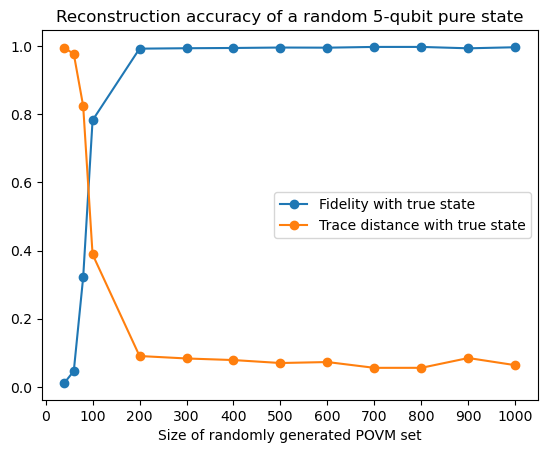

In [28]:
new_traces = [0.9939940970250712, 0.97628853024805, 0.8235752921671977]
new_fidel = [0.011975934214670598,  0.046860798659851155, 0.3217241739385392]
              
x = [40,60,80,100,200,300,400,500,600,700,800,900,1000]
plt.plot(x,new_fidel+fidelities, label='Fidelity with true state', marker='o')
plt.plot(x,new_traces+traces, label='Trace distance with true state', marker='o')
plt.xlabel('Size of randomly generated POVM set')
plt.xticks(range(0,1100,100))
#plt.yticks(np.arange(0,1.1,0.1))
plt.legend()
plt.title('Reconstruction accuracy of a random 5-qubit pure state')
plt.savefig('reconstruction_vs_POVM-size-new.png')

plt.show()


In [ ]:
import concurrent.futures

# Define your commands
commands = []
for k in range(2,9):
    command = f"python ./qst.py {k} 1 -n 'GHZ_{k}'"
    commands.append(command)

def run_command(command):
    process = subprocess.Popen(command, shell=True, stdout=subprocess.PIPE, stderr=subprocess.STDOUT, text=True, bufsize=1)
    for output_line in iter(process.stdout.readline, ''):
        print(f"[{command}] {output_line.strip()}")
    process.stdout.close()
    return_code = process.wait()
    return command, return_code

# Use ThreadPoolExecutor to run commands in parallel
with concurrent.futures.ThreadPoolExecutor() as executor:
    # Submit commands for execution
    futures = [executor.submit(run_command, cmd) for cmd in commands]

    # Wait for all tasks to complete
    concurrent.futures.wait(futures)

    # Retrieve results
    for future in futures:
        command, return_code = future.result()
        print(f"[{command}] Return Code: {return_code}")


In [32]:
GHZ_fidel = [0.9566181127330879, 0.12233217834352263, 0.6168074982579563, 0.459764317031735, 0.0065272973489970115, 0.0004213467040710093, 0.010626520033022885 ]
GHZ_trace_dist = [0.20828401432072335,  0.9368393352316253, 0.6190253543896538, 0.7350073823743302, 0.9967311410920041, 0.9997894277885858, 0.9946728556809625]

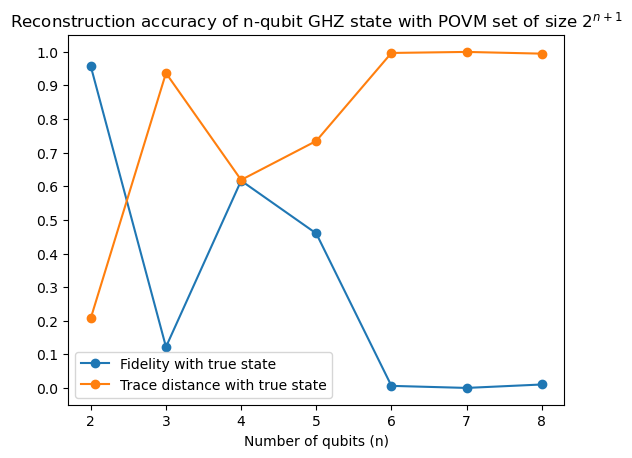

In [37]:
import matplotlib as mpl
mpl.rcParams['text.usetex'] = False


x = range(2,9)
plt.plot(x,GHZ_fidel, label='Fidelity with true state', marker='o')
plt.plot(x,GHZ_trace_dist, label='Trace distance with true state', marker='o')
plt.xlabel('Number of qubits (n)')
plt.yticks(np.arange(0,1.1,0.1))
plt.legend()
plt.title('Reconstruction accuracy of n-qubit GHZ state with POVM set of size $2^{n+1}$')
plt.savefig('reconstruction_vs_GHZ-size.png')